<br/><br/><div id="top"></div>

<center><a style="font-size: 40pt; font-weight: bold">Sarcasm Detection</a></center>
<br/>
<center><a style="font-size: 22pt; font-weight: bold">Binary Classification on News Headlines</a></center>
<br/>

---

# Group members

* Jauroyon, Maxime
* Massouf, Philippe
* Ranjbar, Mahdi


# Presentation of the challenge

## Main question of this challenge

* How to predict the sarcasm of a sentence ? Can you distinguish between fake news and legitimate news?
 

## Data

https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection

Past studies in Sarcasm Detection mostly make use of Twitter datasets collected using hashtag based supervision but such datasets are noisy in terms of labels and language. Furthermore, many tweets are replies to other tweets and detecting sarcasm in these requires the availability of contextual tweets.

To overcome the limitations related to noise in Twitter datasets, this News Headlines dataset for Sarcasm Detection is collected from two news website. TheOnion aims at producing sarcastic versions of current events and we collected all the headlines from News in Brief and News in Photos categories (which are sarcastic). We collect real (and non-sarcastic) news headlines from HuffPost.

The class to predict is a binary variable indicating whether the sentence is sarcastic or not.

## Citation for the dataset

1. Misra, Rishabh and Prahal Arora. "Sarcasm Detection using News Headlines Dataset." AI Open (2023).
2. Misra, Rishabh and Jigyasa Grover. "Sculpting Data for ML: The first act of Machine Learning." ISBN 9798585463570 (2021).

## Resources we used

* https://www.kaggle.com/code/abdulbasitniazi/word2vec-glove-a-beginner-s-guide
* https://www.kaggle.com/code/prashantpathak244/sarcasm-detection-81
* https://www.kaggle.com/code/madz2000/sarcasm-detection-with-glove-word2vec-83-accuracy/notebook
* https://mccormickml.com/2019/07/22/BERT-fine-tuning/
* https://www.kaggle.com/code/nilanml/detecting-sarcasm-using-different-embeddings

# Challenge

# Getting the Data
 
We used Google Colaboratory to run the project so we need to import the data from our google drive

In [1]:
from google.colab import drive

drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [2]:
import os

os.environ["KAGGLE_CONFIG_DIR"] = "/content/gdrive/My Drive/kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive


In [ ]:
!kaggle datasets download -d fullmetal26/glovetwitter27b100dtxt

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /content/gdrive/My Drive/kaggle. Or use the environment method.


In [ ]:
!kaggle datasets download -d rmisra/news-headlines-dataset-for-sarcasm-detection

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /content/gdrive/My Drive/kaggle. Or use the environment method.


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [3]:
#changing the working directory
%cd /content/gdrive/My Drive/kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/kaggle


In [4]:
!ls

glove.twitter.27B.200d.txt  Sarcasm_Headlines_Dataset.json
kaggle.json		    Sarcasm_Headlines_Dataset_v2.json


In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


**Let's first import the librairies we are going to use**

In [8]:
!pip install pytorch-transformers
!pip install --upgrade gensim
!pip install --upgrade torch
!pip install --upgrade keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.4/176.4 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.7/134.7 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 43.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 70.7 MB/s eta 0:00:00
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=1a5e539480eb68c25b594813d0b3fac26df9be24b2eb63a8f1b0f6a5c08c0341
  Stored in directory: /root/.cache/pip/wheels/82/ab/9b/c15899bf659ba74f623ac776e861cf2eb8608c1825ddec66a4
Successfully built sacremoses
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-whe

In [10]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 20.8 MB/s eta 0:00:00


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn import decomposition
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from bs4 import BeautifulSoup
from sklearn.metrics import precision_recall_fscore_support as score
import re, string, unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from string import punctuation
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional, GRU
import tensorflow as tf
import missingno as msno


In [11]:
import torch
import torch.nn as nn
from pytorch_transformers import (
    BertModel,
    BertTokenizer,
    BertConfig,
    WarmupLinearSchedule,
)
import re
import json
from torch.utils.data import Dataset
from torch.utils.data import (
    DataLoader,
    SubsetRandomSampler,
    RandomSampler,
    SequentialSampler,
)
from tqdm import tqdm, trange
import torch.nn.functional as F
from transformers import BertTokenizer, BertModel
import random
from torch.utils.data import TensorDataset, random_split
from transformers import BertForSequenceClassification, AdamW, BertConfig
import torch
from transformers import get_linear_schedule_with_warmup
from sklearn.metrics import precision_score, recall_score, f1_score
import time
import datetime



# Table of Contents

* [Exploratory Data Analysis](#loading)

* [Pre-Processing](#pre-processing)

* [CountVectorizer](#countvect)

* [Tfid](#tfid)

* [Word2Vec](#w2v)

* [Glove](#glove)

* [BERT](#bert)

* [Conclusion](#conc)

* [Future Works](#fut)


<a id="loading"></a>
## Exploratory Data Analysis

**Loading Data**

In [12]:
pd.set_option("display.max_colwidth", None)
df = pd.read_json("Sarcasm_Headlines_Dataset.json", lines=True)
del df["article_link"]
df.head()


,headline,is_sarcastic
0,former versace store clerk sues over secret 'black code' for minority shoppers,0
1,"the 'roseanne' revival catches up to our thorny political mood, for better and worse",0
2,mom starting to fear son's web series closest thing she will have to grandchild,1
3,"boehner just wants wife to listen, not come up with alternative debt-reduction ideas",1
4,j.k. rowling wishes snape happy birthday in the most magical way,0


In [13]:
df.shape


(26709, 2)

In [14]:
df2 = pd.read_json("Sarcasm_Headlines_Dataset_v2.json", lines=True)
del df2["article_link"]
df2.head()


,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clock of hair loss
1,0,"dem rep. totally nails why congress is falling short on gender, racial equality"
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting to work
4,1,mother comes pretty close to using word 'streaming' correctly


In [15]:
df2.shape


(28619, 2)

**Seems like the 2 data sets we are given are different which will let us multiple way to test our models (we can use any of them and split it into train/test OR use one for train and the other for test)**

**Visualization**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_sarcastic', ylabel='count'>

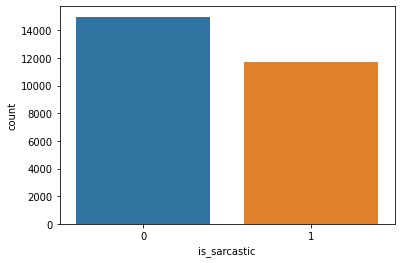

In [16]:
sns.countplot(df.is_sarcastic)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_sarcastic', ylabel='count'>

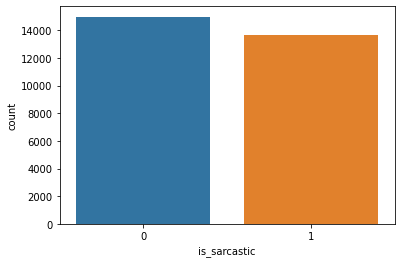

In [17]:
sns.countplot(df2.is_sarcastic)


**The data is balanced**

**WORDCLOUD FOR TEXT THAT IS NOT SARCASTIC (LABEL - 0)**

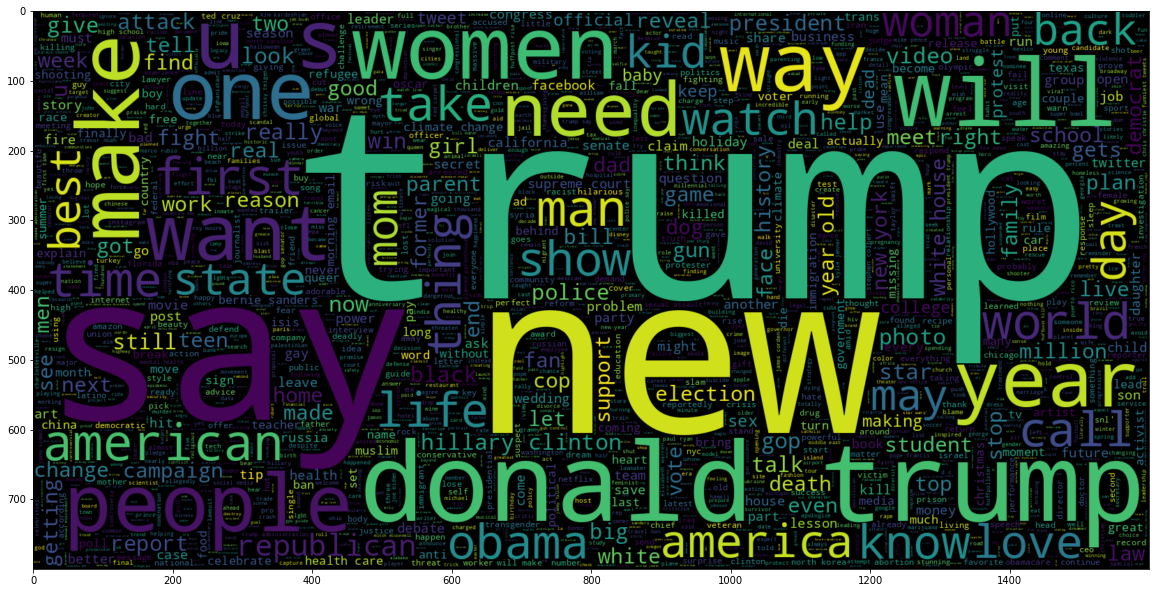

In [18]:
plt.figure(figsize=(20, 20))  # Text that is Not Sarcastic
wc = WordCloud(max_words=2000, width=1600, height=800).generate(
    " ".join(df[df.is_sarcastic == 0].headline)
)
plt.imshow(wc, interpolation="bilinear")


**WORDCLOUD FOR SARCASTIC TEXT (LABEL - 1)**

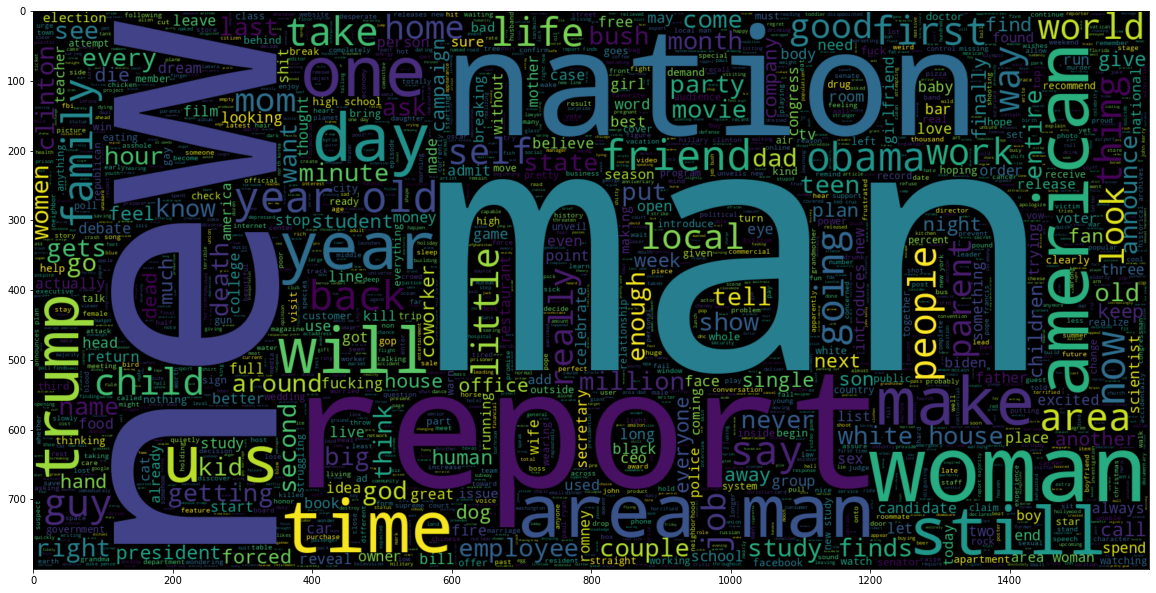

In [19]:
plt.figure(figsize=(20, 20))  # Text that is Sarcastic
wc = WordCloud(max_words=2000, width=1600, height=800).generate(
    " ".join(df[df.is_sarcastic == 1].headline)
)
plt.imshow(wc, interpolation="bilinear")


**Number of characters in texts**

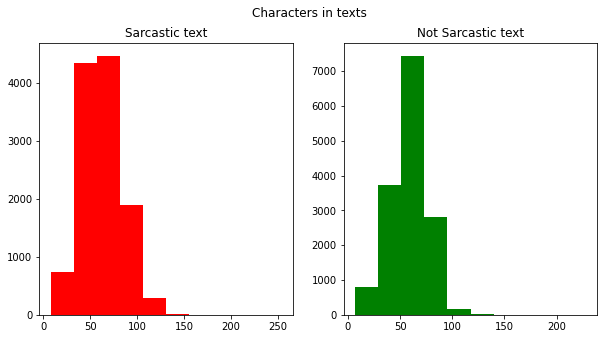

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
text_len = df[df["is_sarcastic"] == 1]["headline"].str.len()
ax1.hist(text_len, color="red")
ax1.set_title("Sarcastic text")
text_len = df[df["is_sarcastic"] == 0]["headline"].str.len()
ax2.hist(text_len, color="green")
ax2.set_title("Not Sarcastic text")
fig.suptitle("Characters in texts")
plt.show()


**Number of words in each text**

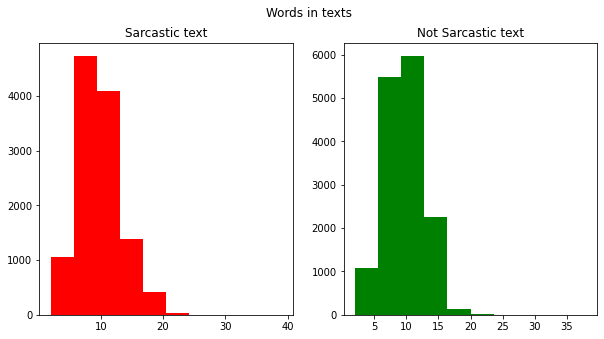

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
text_len = df[df["is_sarcastic"] == 1]["headline"].str.split().map(lambda x: len(x))
ax1.hist(text_len, color="red")
ax1.set_title("Sarcastic text")
text_len = df[df["is_sarcastic"] == 0]["headline"].str.split().map(lambda x: len(x))
ax2.hist(text_len, color="green")
ax2.set_title("Not Sarcastic text")
fig.suptitle("Words in texts")
plt.show()


**Average word length in a text**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each text')

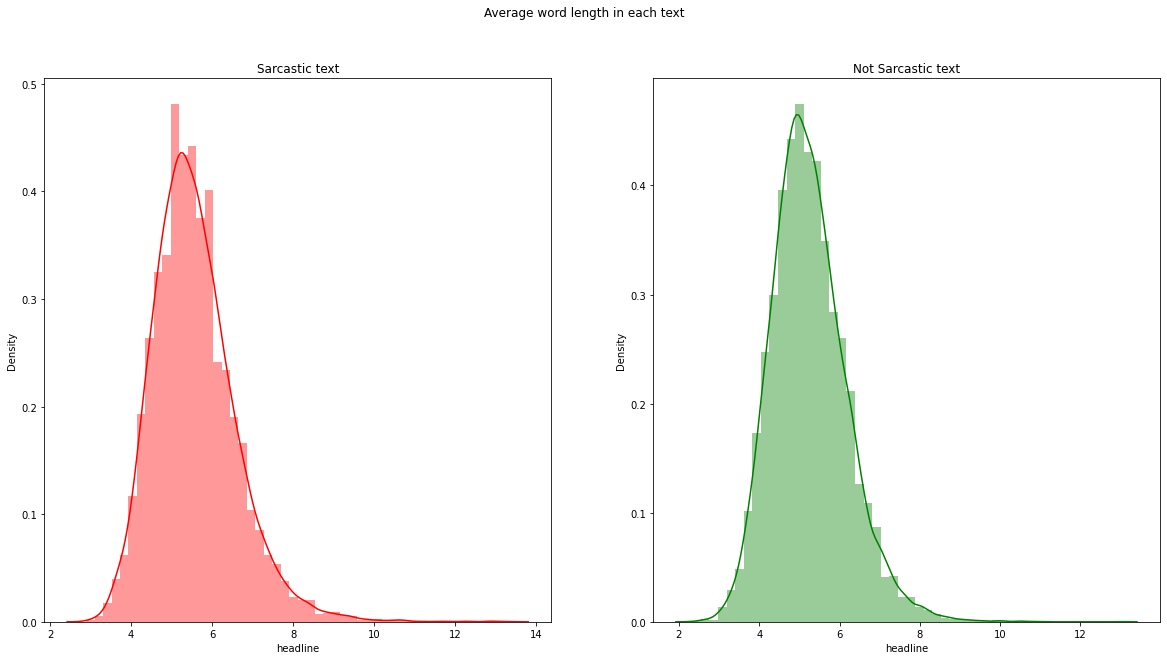

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
word = (
    df[df["is_sarcastic"] == 1]["headline"]
    .str.split()
    .apply(lambda x: [len(i) for i in x])
)
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax1, color="red")
ax1.set_title("Sarcastic text")
word = (
    df[df["is_sarcastic"] == 0]["headline"]
    .str.split()
    .apply(lambda x: [len(i) for i in x])
)
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax2, color="green")
ax2.set_title("Not Sarcastic text")
fig.suptitle("Average word length in each text")


<a id="pre-processing"></a>
## Pre-Processing

In [23]:
df.isna().sum()


headline        0
is_sarcastic    0
dtype: int64

In [24]:
df2.isna().sum()


is_sarcastic    0
headline        0
dtype: int64

**There isn't any missing values to handle**

**topwords are the English words which does not add much meaning to a sentence**

In [25]:
# stopword removal
nltk.download("stopwords")
stop = set(stopwords.words("english"))
p = list(string.punctuation)
stop.update(p)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Basic Data Cleaning**

In [26]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()


def remove_between_square_brackets(text):
    return re.sub("\[[^]]*\]", "", text)


def remove_url(text):
    return re.sub("http\S+", "", text)


def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)


def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text


In [27]:
df["headline"] = df["headline"].apply(denoise_text)


In [28]:
df.head()


,headline,is_sarcastic
0,former versace store clerk sues secret 'black code' minority shoppers,0
1,"'roseanne' revival catches thorny political mood, better worse",0
2,mom starting fear son's web series closest thing grandchild,1
3,"boehner wants wife listen, come alternative debt-reduction ideas",1
4,j.k. rowling wishes snape happy birthday magical way,0


**We still have undesired punctuation like 'roseanne'**

In [29]:
def remove_punctuation(text):
    return re.sub(r"[^\w\s]", "", text)


In [30]:
df["headline"] = df["headline"].apply(remove_punctuation)


In [31]:
df.head()


,headline,is_sarcastic
0,former versace store clerk sues secret black code minority shoppers,0
1,roseanne revival catches thorny political mood better worse,0
2,mom starting fear sons web series closest thing grandchild,1
3,boehner wants wife listen come alternative debtreduction ideas,1
4,jk rowling wishes snape happy birthday magical way,0


In [32]:
df["headline"].iloc[45]


'christian bale visits sikh temple victims'

**It seems like we are done cleaning**

# Let's start by testing some vectorizer and models

**We are going to use the first set (df) for the train/test split**

In [33]:
x_train, x_test, y_train, y_test = train_test_split(
    df.headline, df.is_sarcastic, test_size=0.3, random_state=0
)


In [ ]:
x_train.shape, x_test.shape


((18696,), (8013,))

<a id="countvect"></a>
# COUNTVECTORIZER

**With CountVectorizer**

In [34]:
def algos_test_CountVectorizer(train_xs, test_xs, train_ys, test_ys):
    vectorizer = CountVectorizer()
    train_xs = vectorizer.fit_transform(train_xs)
    test_xs = vectorizer.transform(test_xs)

    algos = [
        LogisticRegression(),
        MultinomialNB(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        SVC(),
        xgb.XGBClassifier()
    ]
    results = []
    for algo in algos:
        print(algo)
        %timeit -n 1 -r 1 algo.fit(train_xs, train_ys)
        pred_ys = algo.predict(test_xs)
        results.append(
            {
                "algo": algo,
                "accuracy": accuracy_score(test_ys, pred_ys),
                "precision": score(test_ys, pred_ys, average="macro")[0],
                "recall": score(test_ys, pred_ys, average="macro")[1],
                "f1": score(test_ys, pred_ys, average="macro")[2],
            }
        )
    return pd.DataFrame.from_records(results)

results_CountVectorizer = algos_test_CountVectorizer(x_train, x_test, y_train, y_test)
results_CountVectorizer

LogisticRegression()
547 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
MultinomialNB()
14.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
DecisionTreeClassifier()
9.53 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
RandomForestClassifier()
34.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
SVC()
1min 9s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=No

algo  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       


<a id="tfid"></a>
# TFIDVECTORIZER

**With TfidVectorizer**

In [35]:
def algos_test_TfidVectorizer(train_xs, test_xs, train_ys, test_ys):
    vectorizer = TfidfVectorizer()
    train_xs = vectorizer.fit_transform(train_xs)
    test_xs = vectorizer.transform(test_xs)

    algos = [
        LogisticRegression(),
        MultinomialNB(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        SVC(),
        xgb.XGBClassifier()
    ]
    results = []
    for algo in algos:
        print(algo)
        %timeit -n 1 -r 1 algo.fit(train_xs, train_ys)
        pred_ys = algo.predict(test_xs)
        results.append(
            {
                "algo": algo,
                "accuracy": accuracy_score(test_ys, pred_ys),
                "precision": score(test_ys, pred_ys, average="macro")[0],
                "recall": score(test_ys, pred_ys, average="macro")[1],
                "f1": score(test_ys, pred_ys, average="macro")[2],
            }
        )
    return pd.DataFrame.from_records(results)

results_TfidVectorizer = algos_test_TfidVectorizer(x_train, x_test, y_train, y_test)
results_TfidVectorizer

LogisticRegression()
539 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
MultinomialNB()
12.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
DecisionTreeClassifier()
10.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
RandomForestClassifier()
32.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
SVC()
1min 1s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=No

algo  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

**It seems like there isn't much of a difference between CountVectorizer and TfidVectorizer, and we got 80/79% accuracy with MultinomialNB model and SVC**

# Next things to try : word embedding with Word2Vec and Glove (expected to get better results by capturing the context)

<a id="w2v"></a>
# WORD2VEC

**formating for gensim**

In [36]:
words = []
for i in df.headline.values:
    words.append(i.split())
words[:5]


[['former',
  'versace',
  'store',
  'clerk',
  'sues',
  'secret',
  'black',
  'code',
  'minority',
  'shoppers'],
 ['roseanne',
  'revival',
  'catches',
  'thorny',
  'political',
  'mood',
  'better',
  'worse'],
 ['mom',
  'starting',
  'fear',
  'sons',
  'web',
  'series',
  'closest',
  'thing',
  'grandchild'],
 ['boehner',
  'wants',
  'wife',
  'listen',
  'come',
  'alternative',
  'debtreduction',
  'ideas'],
 ['jk', 'rowling', 'wishes', 'snape', 'happy', 'birthday', 'magical', 'way']]

In [37]:
import gensim

# Dimension of vectors we are generating
EMBEDDING_DIM = 200

# Creating Word Vectors by Word2Vec Method (takes time...)
w2v_model = gensim.models.Word2Vec(
    sentences=words, vector_size=EMBEDDING_DIM, window=5, min_count=1
)


In [38]:
# vocab size
len(w2v_model.wv)
# We have now represented each of 28359 words by a 200dim vector.


28359

In [39]:
from keras.utils import pad_sequences


In [40]:
tokenizer = text.Tokenizer(num_words=35000)
tokenizer.fit_on_texts(words)
tokenized_train = tokenizer.texts_to_sequences(words)
x = pad_sequences(tokenized_train, maxlen=20)


In [41]:
# Adding 1 because of reserved 0 index
# Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (0s). This Vector is filled with zeros.
# Thus our vocab size increases by 1
vocab_size = len(tokenizer.word_index) + 1


**creation of our embedding matrix with Word2Vec**

In [42]:
# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix


In [43]:
# Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
embedding_vectors = get_weight_matrix(w2v_model.wv, tokenizer.word_index)


**TRAINING WORD2VEC MODEL**

**Using a Recurrent Neural Network (RNN) with 4 layers with our embedding matrix as the first layer**

In [44]:
# Defining Neural Network
model = Sequential()
# Trainable embeddidng layer
model.add(
    Embedding(
        vocab_size,
        output_dim=EMBEDDING_DIM,
        weights=[embedding_vectors],
        input_length=20,
        trainable=True,
    )
)
# LSTM
model.add(
    Bidirectional(
        LSTM(units=128, recurrent_dropout=0.3, dropout=0.3, return_sequences=True)
    )
)
# GRU
model.add(Bidirectional(GRU(units=32, recurrent_dropout=0.1, dropout=0.1)))
model.add(Dense(1, activation="sigmoid"))
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss="binary_crossentropy",
    metrics=["acc"],
)

del embedding_vectors


In [45]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 200)           5672000   
                                                                 
 bidirectional (Bidirectiona  (None, 20, 256)          336896    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               55680     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 6,064,641
Trainable params: 6,064,641
Non-trainable params: 0
_________________________________________________________________


In [46]:
x_train, x_test, y_train, y_test = train_test_split(
    x, df.is_sarcastic, test_size=0.3, random_state=0
)


In [47]:
history = model.fit(
    x_train, y_train, batch_size=128, validation_data=(x_test, y_test), epochs=5
)


Epoch 1/5
147/147 [==============================] - 95s 529ms/step - loss: 0.5245 - acc: 0.7283 - val_loss: 0.4158 - val_acc: 0.8108
Epoch 2/5
147/147 [==============================] - 66s 448ms/step - loss: 0.1795 - acc: 0.9336 - val_loss: 0.5582 - val_acc: 0.7857
Epoch 3/5
147/147 [==============================] - 65s 444ms/step - loss: 0.0509 - acc: 0.9828 - val_loss: 0.7208 - val_acc: 0.7897
Epoch 4/5
147/147 [==============================] - 65s 443ms/step - loss: 0.0196 - acc: 0.9926 - val_loss: 0.9665 - val_acc: 0.7832
Epoch 5/5
147/147 [==============================] - 62s 423ms/step - loss: 0.0089 - acc: 0.9974 - val_loss: 1.2120 - val_acc: 0.7842


In [48]:
print(
    "Accuracy of the model on Training Data is - ",
    model.evaluate(x_train, y_train)[1] * 100,
)
print(
    "Accuracy of the model on Testing Data is - ",
    model.evaluate(x_test, y_test)[1] * 100,
)


585/585 [==============================] - 17s 28ms/step - loss: 0.0016 - acc: 0.9997
Accuracy of the model on Training Data is -  99.97325539588928
251/251 [==============================] - 9s 34ms/step - loss: 1.2120 - acc: 0.7842
Accuracy of the model on Testing Data is -  78.42256426811218


**ANALYSIS AFTER TRAINING OF WORD2VEC MODEL**

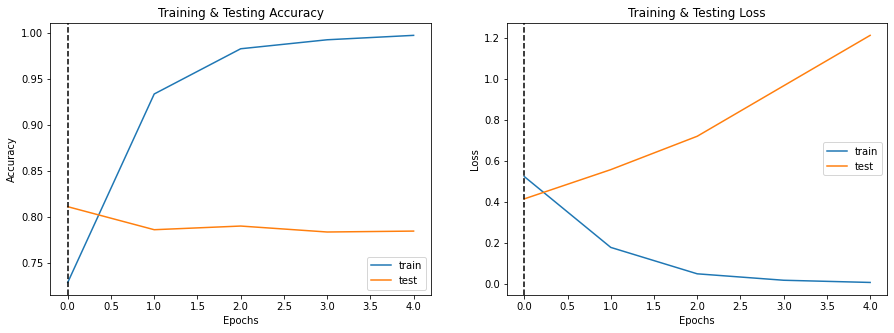

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(history.history["acc"])
ax1.plot(history.history["val_acc"])
vline_cut = np.where(history.history["val_acc"] == np.max(history.history["val_acc"]))[
    0
][0]
ax1.axvline(x=vline_cut, color="k", linestyle="--")
ax1.set_title("Training & Testing Accuracy")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.legend(["train", "test"])

ax2.plot(history.history["loss"])
ax2.plot(history.history["val_loss"])
vline_cut = np.where(
    history.history["val_loss"] == np.min(history.history["val_loss"])
)[0][0]
ax2.axvline(x=vline_cut, color="k", linestyle="--")
ax2.set_title("Training & Testing Loss")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend(["train", "test"])
plt.show()


**black lines are maximum accuracy and minimum loss of testing set**

**SEEMS LIKE THE MODEL IS OVERFITTING AND NOT PERFORMING WELL ON THE TEST DATA**

**The reason behind it is that we let the model change the embedding matrix during training so that we increase our accuracy but we quickly overfit, which is why for some models it is often specify to do only 2 or 4 epochs to get better results, here we should stop at the epochs were we find the best accuracy on test set before we overfit (we tried with Non-trainable embedding matrix and got 61% accuracy on both train and test set at the 5th epoch)**

251/251 [==============================] - 8s 28ms/step


<AxesSubplot:>

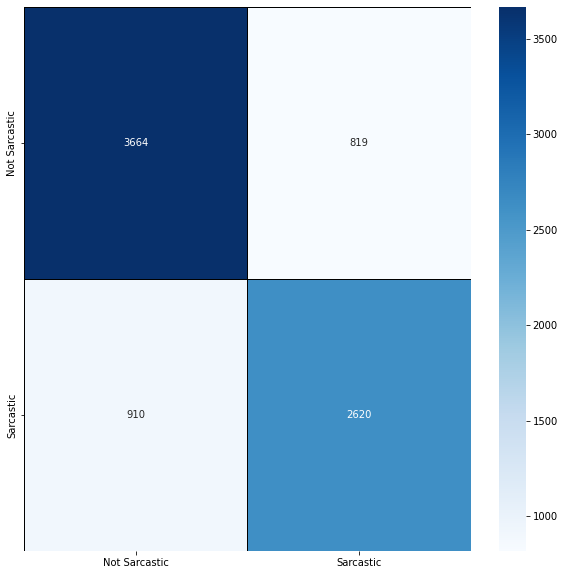

In [50]:
pred = (model.predict(x_test) > 0.5).astype("int32")
cm = pd.DataFrame(
    confusion_matrix(y_test, pred),
    index=["Not Sarcastic", "Sarcastic"],
    columns=["Not Sarcastic", "Sarcastic"],
)
plt.figure(figsize=(10, 10))
sns.heatmap(
    cm,
    cmap="Blues",
    linecolor="black",
    linewidth=1,
    annot=True,
    fmt="",
    xticklabels=["Not Sarcastic", "Sarcastic"],
    yticklabels=["Not Sarcastic", "Sarcastic"],
)


In [51]:
print(classification_report(y_test, pred, target_names=["Not Sarcastic", "Sarcastic"]))


               precision    recall  f1-score   support

Not Sarcastic       0.80      0.82      0.81      4483
    Sarcastic       0.76      0.74      0.75      3530

     accuracy                           0.78      8013
    macro avg       0.78      0.78      0.78      8013
 weighted avg       0.78      0.78      0.78      8013



**Vectorizer are doing a better job than that so let's try another embedding method (similar)**


<a id="glove"></a>
# GLOVE

**Glove Vectors**

In [52]:
x_train, x_test, y_train, y_test = train_test_split(
    df.headline, df.is_sarcastic, test_size=0.3, random_state=0
)


In [53]:
max_features = 35000
maxlen = 200


**Tokenizing Text -> Repsesenting each word by a number**

**Mapping of orginal word to number is preserved in word_index property of tokenizer**

**Tokenized applies basic processing like changing it to lower case, explicitely setting that as False**

**Lets keep all news to 200, add padding to news with less than 200 words and truncating long ones**

In [54]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = pad_sequences(tokenized_train, maxlen=maxlen)
tokenized_test = tokenizer.texts_to_sequences(x_test)
x_test = pad_sequences(tokenized_test, maxlen=maxlen)


## Transfer learning 

we are downloading a pre-trained embedding matrix on a bigger dataset to have a better understanding of the contexts of each words

In [55]:
EMBEDDING_FILE = "glove.twitter.27B.200d.txt"


def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype="float32")


embeddings_index = dict(
    get_coefs(*o.rstrip().rsplit(" ")) for o in open(EMBEDDING_FILE)
)


**For each words in our data we take the corresponding embedding vector from the pre-trained embedding matrix**

In [56]:
all_embs = np.stack(embeddings_index.values())
emb_mean, emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
# we add 1 to vocabulary size to get rid of this type of error : InvalidArgumentError: indices[26,0] = 5001 is not in [0, 5001)
nb_words = min(max_features, len(word_index)) + 1
# change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(
    emb_mean, emb_std, (nb_words, embed_size)
)
for word, i in word_index.items():
    if i >= max_features:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


**Basic Model Parameters**

In [57]:
batch_size = 128
epochs = 2
embed_size = 200


**Training of GLOVE Model**

**Using a Recurrent Neural Network (RNN) with 3 layers with our embedding matrix as the first layer (We drop GRU for this one)**

In [58]:
# Defining Neural Network
model = Sequential()
# Trainable embeddidng layer
model.add(
    Embedding(
        nb_words,
        output_dim=embed_size,
        weights=[embedding_matrix],
        input_length=200,
        trainable=True,
    )
)
# LSTM
model.add(Bidirectional(LSTM(units=128, recurrent_dropout=0.5, dropout=0.5)))
model.add(Dense(1, activation="sigmoid"))
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss="binary_crossentropy",
    metrics=["acc"],
)


In [59]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 200)          4758400   
                                                                 
 bidirectional_2 (Bidirectio  (None, 256)              336896    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 5,095,553
Trainable params: 5,095,553
Non-trainable params: 0
_________________________________________________________________


In [60]:
history = model.fit(
    x_train, y_train, batch_size=batch_size, validation_data=(x_test, y_test), epochs=5
)


Epoch 1/5
147/147 [==============================] - 337s 2s/step - loss: 0.5051 - acc: 0.7569 - val_loss: 0.4025 - val_acc: 0.8155
Epoch 2/5
147/147 [==============================] - 325s 2s/step - loss: 0.2179 - acc: 0.9133 - val_loss: 0.4575 - val_acc: 0.8168
Epoch 3/5
147/147 [==============================] - 324s 2s/step - loss: 0.0804 - acc: 0.9714 - val_loss: 0.6130 - val_acc: 0.8124
Epoch 4/5
147/147 [==============================] - 315s 2s/step - loss: 0.0391 - acc: 0.9865 - val_loss: 0.8845 - val_acc: 0.8048
Epoch 5/5
147/147 [==============================] - 311s 2s/step - loss: 0.0226 - acc: 0.9926 - val_loss: 1.1268 - val_acc: 0.8069


In [61]:
print(
    "Accuracy of the model on Training Data is - ",
    model.evaluate(x_train, y_train)[1] * 100,
)
print(
    "Accuracy of the model on Testing Data is - ",
    model.evaluate(x_test, y_test)[1] * 100,
)


585/585 [==============================] - 71s 122ms/step - loss: 0.0059 - acc: 0.9981
Accuracy of the model on Training Data is -  99.8074471950531
251/251 [==============================] - 30s 121ms/step - loss: 1.1268 - acc: 0.8069
Accuracy of the model on Testing Data is -  80.69387078285217


**ANALYSIS AFTER TRAINING OF GLOVE EMBEDDINGS MODEL**

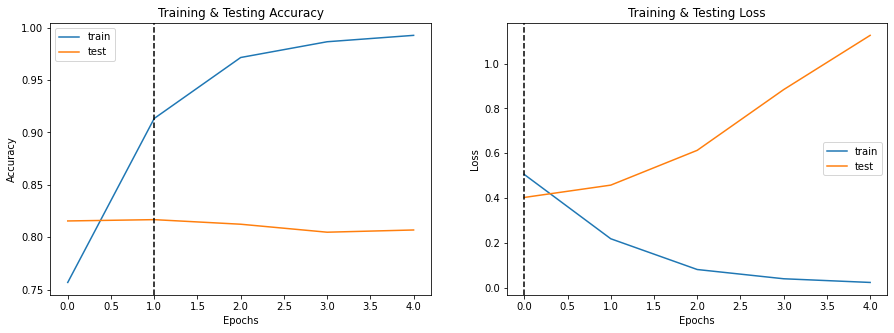

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(history.history["acc"])
ax1.plot(history.history["val_acc"])
vline_cut = np.where(history.history["val_acc"] == np.max(history.history["val_acc"]))[
    0
][0]
ax1.axvline(x=vline_cut, color="k", linestyle="--")
ax1.set_title("Training & Testing Accuracy")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.legend(["train", "test"])

ax2.plot(history.history["loss"])
ax2.plot(history.history["val_loss"])
vline_cut = np.where(
    history.history["val_loss"] == np.min(history.history["val_loss"])
)[0][0]
ax2.axvline(x=vline_cut, color="k", linestyle="--")
ax2.set_title("Training & Testing Loss")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend(["train", "test"])
plt.show()


**SEEMS LIKE THE MODEL IS OVERFITTING TOO AND NOT PERFORMING WELL ON THE TEST DATA BUT STILL BETTER THAN Word2Vec**

**Just like Word2Vec the overfit and similar scores were predictable but still up to 4% better than Word2Vec and 2% better than Vectorizer if we would have stop at the best epoch**

251/251 [==============================] - 31s 120ms/step


<AxesSubplot:>

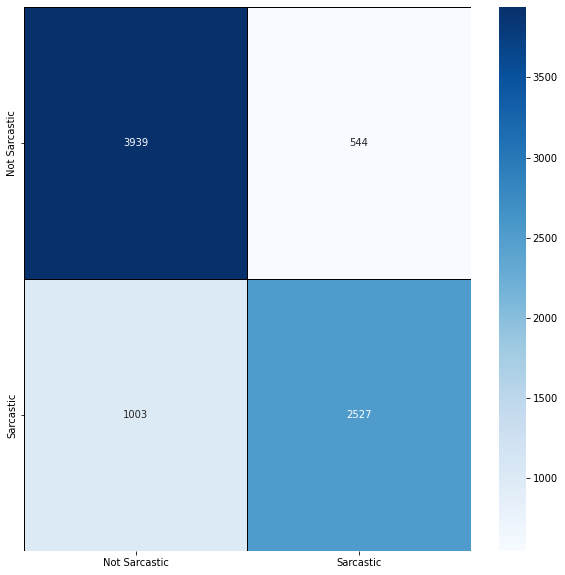

In [63]:
pred = (model.predict(x_test) > 0.5).astype("int32")
cm = pd.DataFrame(
    confusion_matrix(y_test, pred),
    index=["Not Sarcastic", "Sarcastic"],
    columns=["Not Sarcastic", "Sarcastic"],
)
plt.figure(figsize=(10, 10))
sns.heatmap(
    cm,
    cmap="Blues",
    linecolor="black",
    linewidth=1,
    annot=True,
    fmt="",
    xticklabels=["Not Sarcastic", "Sarcastic"],
    yticklabels=["Not Sarcastic", "Sarcastic"],
)


In [64]:
print(classification_report(y_test, pred, target_names=["Not Sarcastic", "Sarcastic"]))


               precision    recall  f1-score   support

Not Sarcastic       0.80      0.88      0.84      4483
    Sarcastic       0.82      0.72      0.77      3530

     accuracy                           0.81      8013
    macro avg       0.81      0.80      0.80      8013
 weighted avg       0.81      0.81      0.80      8013



**And we also have a better precision and recall !**


<a id="bert"></a>
# Fine-tuning a pretrained model (BERT)

In [65]:
x_train, x_test, y_train, y_test = train_test_split(
    df.headline, df.is_sarcastic, test_size=0.3, random_state=0
)


In [66]:
# Set random seeds for reproducibility
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed_all(RANDOM_SEED)
random.seed(RANDOM_SEED)

sentences = df.headline

# Load the BERT tokenizer.
print("Loading BERT tokenizer...")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased", do_lower_case=True)

# Print the original sentence.
print(" Original: ", sentences[0])

# Print the sentence split into tokens.
print("Tokenized: ", tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print("Token IDs: ", tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))


Loading BERT tokenizer...


 Original:  former versace store clerk sues secret black code minority shoppers
Tokenized:  ['former', 'versa', '##ce', 'store', 'clerk', 'sue', '##s', 'secret', 'black', 'code', 'minority', 'shop', '##pers']
Token IDs:  [2280, 18601, 3401, 3573, 7805, 9790, 2015, 3595, 2304, 3642, 7162, 4497, 7347]


In [67]:
max_len = 0

for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print("Max sentence length: ", max_len)


Max sentence length:  41


In [68]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []
labels = df.is_sarcastic
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
        sent,  # Sentence to encode.
        add_special_tokens=True,  # Add '[CLS]' and '[SEP]'
        max_length=64,  # Pad & truncate all sentences.
        pad_to_max_length=True,
        return_attention_mask=True,  # Construct attn. masks.
        return_tensors="pt",  # Return pytorch tensors.
    )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict["input_ids"])

    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict["attention_mask"])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print("Original: ", sentences[0])
print("Token IDs:", input_ids[0])


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  former versace store clerk sues secret black code minority shoppers
Token IDs: tensor([  101,  2280, 18601,  3401,  3573,  7805,  9790,  2015,  3595,  2304,
         3642,  7162,  4497,  7347,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0])


In [69]:
# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 80-20 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print("{:>5,} training samples".format(train_size))
print("{:>5,} validation samples".format(val_size))


21,367 training samples
5,342 validation samples


In [70]:
batch_size = 32

train_dataloader = DataLoader(
    train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size
)

validation_dataloader = DataLoader(
    val_dataset, sampler=SequentialSampler(val_dataset), batch_size=batch_size
)


In [72]:
# Load BertForSequenceClassification, the pretrained BERT model with a single
# linear classification layer on top.
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",  # Use the 12-layer BERT model, with an uncased vocab.
    num_labels=2,
    output_attentions=False,  # Whether the model returns attentions weights.
    output_hidden_states=False,  # Whether the model returns all hidden-states.
)

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [73]:
batch_size = 32

optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
epochs = 4


/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [74]:
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,  # Default value in run_glue.py
    num_training_steps=total_steps,
)


In [75]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)


# Function to calculate the precision of our predictions vs labels
def flat_precision(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return precision_score(labels_flat, pred_flat)


# Function to calculate the recall of our predictions vs labels
def flat_recall(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return recall_score(labels_flat, pred_flat)


# Function to calculate the f1 score of our predictions vs labels
def flat_f1(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, pred_flat)


In [76]:
def format_time(elapsed):
    """
    Takes a time in seconds and returns a string hh:mm:ss
    """
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [83]:
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


training_stats = []

total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    # Perform one full pass over the training set.

    print("")
    print("======== Epoch {:} / {:} ========".format(epoch_i + 1, epochs))
    print("Training...")

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0
    total_train_accuracy = 0

    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print(
                "  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.".format(
                    step, len(train_dataloader), elapsed
                )
            )

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()

        output = model(
            b_input_ids,
            token_type_ids=None,
            attention_mask=b_input_mask,
            labels=b_labels,
        )
        loss = output.loss
        logits = output.logits.detach().cpu().numpy()
        label_ids = b_labels.to("cpu").numpy()
        total_train_loss += loss.item()

        total_train_accuracy += flat_accuracy(logits, label_ids)
        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)
    avg_train_acc = total_train_accuracy / len(train_dataloader)
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))

    # ========================================
    #               Validation
    # ========================================

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    total_eval_accuracy = 0
    total_eval_precision = 0
    total_eval_recall = 0
    total_eval_f1 = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    preds = []
    labs = []
    # Evaluate data for one epoch
    for batch in validation_dataloader:

        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        with torch.no_grad():

            output = model(
                b_input_ids,
                token_type_ids=None,
                attention_mask=b_input_mask,
                labels=b_labels,
            )
            loss = output.loss
            logits = output.logits
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to("cpu").numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        total_eval_precision += flat_precision(logits, label_ids)
        total_eval_recall += flat_recall(logits, label_ids)
        total_eval_f1 += flat_f1(logits, label_ids)
        preds.append(np.argmax(logits, axis=1).flatten())
        labs.append(label_ids)

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    avg_val_precision = total_eval_precision / len(validation_dataloader)
    print("  Precision: {0:.2f}".format(avg_val_precision))

    avg_val_recall = total_eval_recall / len(validation_dataloader)
    print("  Recall: {0:.2f}".format(avg_val_recall))

    avg_val_f1 = total_eval_f1 / len(validation_dataloader)
    print("  F1: {0:.2f}".format(avg_val_f1))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)

    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            "epoch": epoch_i + 1,
            "Training Loss": avg_train_loss,
            "Training Accur": avg_train_acc,
            "Valid. Loss": avg_val_loss,
            "Valid. Accur.": avg_val_accuracy,
            "Valid. precision": avg_val_precision,
            "Valid. recall": avg_val_recall,
            "Valid. F1": avg_val_f1,
            "Training Time": training_time,
            "Validation Time": validation_time,
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time() - total_t0)))



======== Epoch 1 / 4 ========
Training...
  Batch    40  of    668.    Elapsed: 0:00:14.
  Batch    80  of    668.    Elapsed: 0:00:27.
  Batch   120  of    668.    Elapsed: 0:00:41.
  Batch   160  of    668.    Elapsed: 0:00:54.
  Batch   200  of    668.    Elapsed: 0:01:08.
  Batch   240  of    668.    Elapsed: 0:01:22.
  Batch   280  of    668.    Elapsed: 0:01:35.
  Batch   320  of    668.    Elapsed: 0:01:49.
  Batch   360  of    668.    Elapsed: 0:02:02.
  Batch   400  of    668.    Elapsed: 0:02:16.
  Batch   440  of    668.    Elapsed: 0:02:30.
  Batch   480  of    668.    Elapsed: 0:02:43.
  Batch   520  of    668.    Elapsed: 0:02:57.
  Batch   560  of    668.    Elapsed: 0:03:10.
  Batch   600  of    668.    Elapsed: 0:03:24.
  Batch   640  of    668.    Elapsed: 0:03:38.

  Average training loss: 0.44
  Training epcoh took: 0:03:47

Running Validation...
  Accuracy: 0.86
  Precision: 0.83
  Recall: 0.83
  F1: 0.83
  Validation Loss: 0.34
  Validation took: 0:00:19

=======

In [84]:
# Display floats with two decimal places.
pd.set_option("precision", 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index("epoch")

# Display the table.
df_stats


,Training Loss,Training Accur,Valid. Loss,Valid. Accur.,Valid. precision,Valid. recall,Valid. F1,Training Time,Validation Time
epoch,,,,,,,,,
1,0.44,0.80,0.34,0.86,0.83,0.83,0.83,0:03:47,0:00:19
2,0.24,0.90,0.33,0.87,0.85,0.85,0.84,0:03:47,0:00:19
3,0.14,0.95,0.40,0.87,0.88,0.83,0.85,0:03:47,0:00:19
4,0.09,0.97,0.50,0.88,0.86,0.85,0.85,0:03:47,0:00:19


([<matplotlib.axis.XTick at 0x7f67402a3160>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

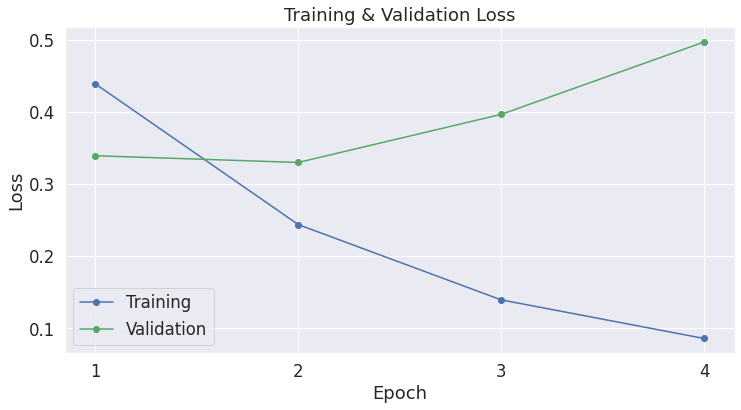

In [85]:
import matplotlib.pyplot as plt


import seaborn as sns

# Use plot styling from seaborn.
sns.set(style="darkgrid")

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12, 6)

# Plot the learning curve.
plt.plot(df_stats["Training Loss"], "b-o", label="Training")
plt.plot(df_stats["Valid. Loss"], "g-o", label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])


([<matplotlib.axis.XTick at 0x7f670d50e8b0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

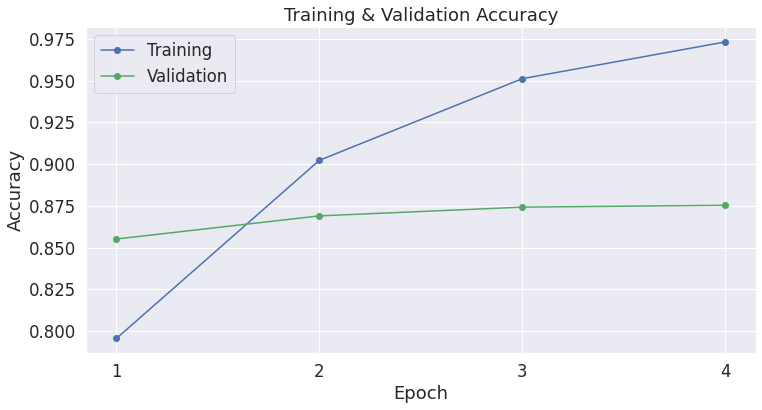

In [87]:
sns.set(style="darkgrid")

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12, 6)


plt.plot(df_stats["Training Accur"], "b-o", label="Training")
plt.plot(df_stats["Valid. Accur."], "g-o", label="Validation")

plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.xticks([1, 2, 3, 4])


In [88]:
fp = np.where((logits[:, 0] > logits[:, 1]) & (label_ids == 1))[0]
fn = np.where((logits[:, 0] < logits[:, 1]) & (label_ids == 0))[0]
print("False Positive: ", fp)
print("False Negative: ", fn)
print("False Positive Text: ", df.loc[fp, "headline"])
print("False Negative Text: ", df.loc[fn, "headline"])


False Positive:  [27]
False Negative:  [12 24]
False Positive Text:  27    excon back behind bar
Name: headline, dtype: object
False Negative Text:  12    north korea praises trump urges us voters reject dull hillary
24         ted cruz hits panic button we could lose houses congress
Name: headline, dtype: object


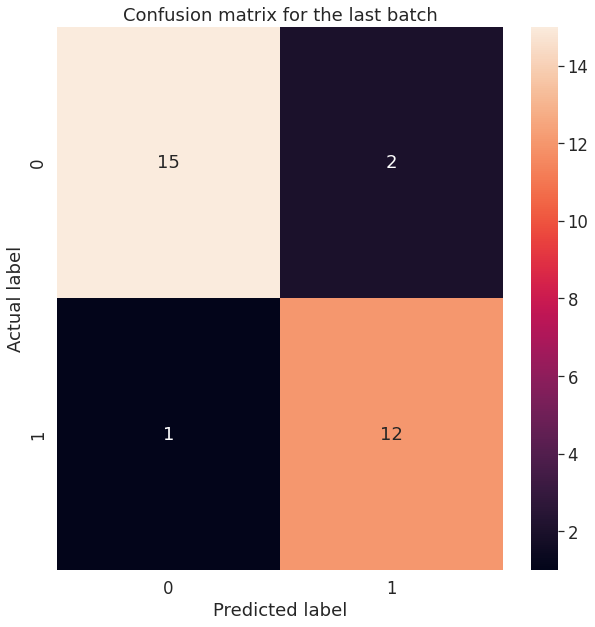

In [108]:
y_pred = np.argmax(logits, axis=1)
cm = confusion_matrix(label_ids, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix for the last batch")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()


We reach an accuracy with the BERT model which is high than with the other methods and didn't require additional tweaking of hyperparameters

<a id="conc"></a>
# Explanation of what we have achieved, conclusion and perspectives

Our best score is 88% with the pre-trained BERT model

We tried multiple models with CountVectorizer and TfidVectorizer to find that they were having similar results and pretty high (80%) but can be explained just by looking back at the wordclouds from recurrent words in sarcastics and not sarcastics headlines

We than did some word embedding to catch the context of words and relations between them with Word2Vec and Glove and giving the embedding matrix to an RNN, we got up to 79% and 82% accuracy which wasn't satisfying compared to vectorizer

And finally we tried with a pre-trained BERT model which had the best results with 88% accuracy !


<a id="fut"></a>

# Future Work

- Use different models such as RoBERTa
- tune hyperparameters